In [20]:
# Instalar liberrías en Google Colab

!pip install pandas requests wordcloud matplotlib

# Acceder a videos de canales de youtube
!pip install google-api-python-client

In [52]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import pandas as pd
import requests
from googleapiclient.discovery import build
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
# API Key de YouTube
API_KEY = 'TU_API_KEY_AQUI'

# ID del video
VIDEO_ID = 'XTUAwOqEdZY'

# Construcción del cliente de la API
youtube = build('youtube', 'v3', developerKey=API_KEY)

# Lista para almacenar comentarios
all_comments = []

# Manejo de paginación
next_page_token = None
max_comments = 200  # Límite de comentarios a obtener

while True:
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId=VIDEO_ID,
        maxResults=100,  # Límite máximo por solicitud
        pageToken=next_page_token
    )
    response = request.execute()

    # Extraer los comentarios
    comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response.get('items', [])]

    # Guardar comentarios con el video ID
    comments_in_video_info = {'video_id': VIDEO_ID, 'comments': comments_in_video}
    all_comments.append(comments_in_video_info)

    # Control de paginación
    next_page_token = response.get('nextPageToken')
    if not next_page_token or len(all_comments) >= max_comments:
        break

# Imprimir los primeros 5 comentarios
for i, comment in enumerate(all_comments[0]['comments'][:5], 1):
    print(f"{i}. {comment[:100]}...")  # Muestra los primeros 100 caracteres

1. QUE  PDTE BUKELI Y AQUI YO NE MUERO DE HAMBRE SI. No VENDO CUYES DIOS BENDIGA SAN SALVADOR POR QUITA...
2. Felicidad y éxitos en todas sus decisiones. Adelante y a seguir con el pueblo. Éxitos !!!!...
3. Pero envés de criticar  coja ejemplo  colombiana. Pero  ni antes  ni después  ese llamado petro asid...
4. You are the Best...
5. Presi yo voy a votar mil veces por usted....


In [54]:
comments_df = pd.DataFrame(all_comments)
comments_df.head()

,video_id,comments
0,XTUAwOqEdZY,[QUE PDTE BUKELI Y AQUI YO NE MUERO DE HAMBRE...
1,XTUAwOqEdZY,[NAYIB BUKELE PRESIDENTE DEL SALVADOR FELICIDA...
2,XTUAwOqEdZY,"[Dios bendice al Presudente que gobierna buen,..."
3,XTUAwOqEdZY,"[Cómo de ser, Y con mu ya en di siino y trabar..."
4,XTUAwOqEdZY,[Un discurso breves pero con muchos valor y f...


In [56]:

# Descargar las stopwords en español si aún no se tienen
nltk.download('stopwords')

# Cargar stopwords en español
stop_words = set(stopwords.words('spanish'))

stop_words.update({x.upper() for x in extra_stop_words})

# Eliminar stopwords de los comentarios
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(
    lambda x: [word for word in str(x).split() if word.lower() not in stop_words]
)

# Convertir los comentarios filtrados en una lista de palabras
all_words = [word for sublist in comments_df['comments_no_stopwords'].tolist() for word in sublist]
all_words_str = ' '.join(all_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


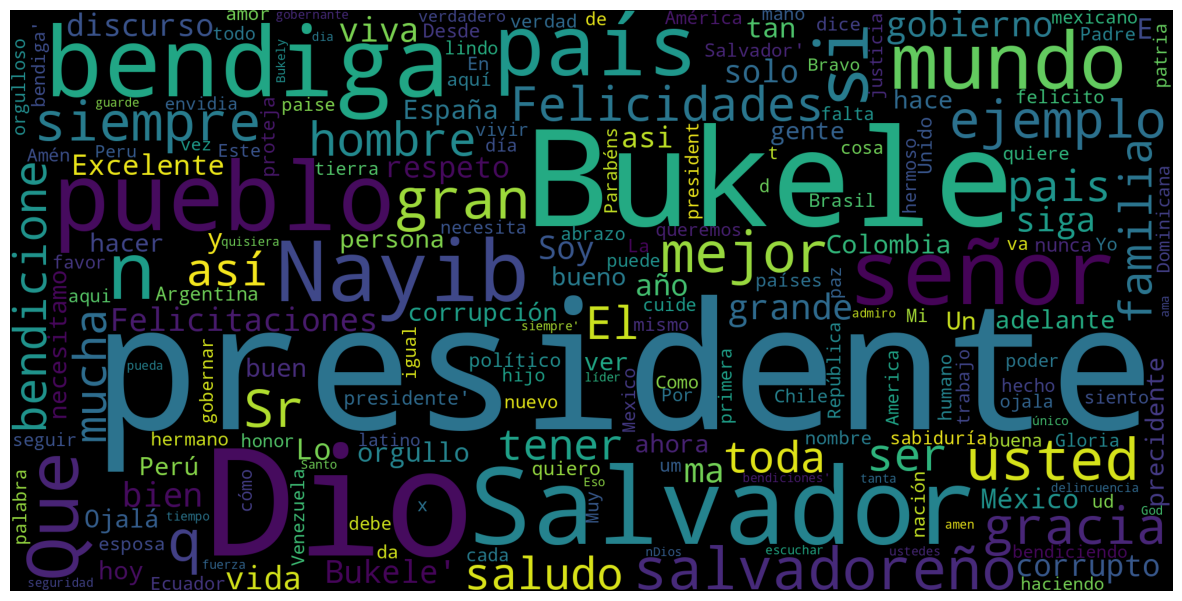

In [57]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)